# ML basics

Classical machine learning is (for the most part) split into two main categories:

## 1. Supervised Learning

**Supervised learning** aims to the relationship between a set of input features and an associated target or labels

Supervised learning is further subset in to regression and classification tasks

Regression problems are ones where the labels or targets are one or more continuous valued numbers

Classification problems handle assigning one of a finite number of labels (e.g. facial recognition, predicting a binary outcome)

Machine learning algorithms for Regression and Classification tasks are closely related as are the problems

In fact, you can often re-frame a regression problem as a classification one or vice versa depending on the task at hand

## 2. Unsupervised Learning

**Unsupervised learning** takes only input features and seeks to understand underlying structure among them

There is not a user supplied target or label the algorithm is trying to predict

Examples of algorithms in this class are dimensionality reduction and clustering

## Running example

As an example to demonstrate these topics, we'll work with the following example of a regression problem



In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
url = "https://storage.googleapis.com/qeds/data/kc_house_data.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


This dataset contains sales prices on houses in King County (which
include Seattle),
Washington, from May 2014 to May 2015. The data comes from
[Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction)
. Variable definitions and additional documentation are available at
that link.

In [9]:
X = df.drop(["price", "date", "id"], axis=1).copy()
# convert everything to be a float for later on
for col in list(X):
    X[col] = X[col].astype(float)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [10]:
# notice the log here!
y = np.log(df["price"])
df["log_price"] = y
y.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price, dtype: float64

While we will be using all the variables in `X` in our regression models,
we will explain some algorithms using only the `sqft_living` variable

Here’s what the log house price looks like against `sqft_living`:

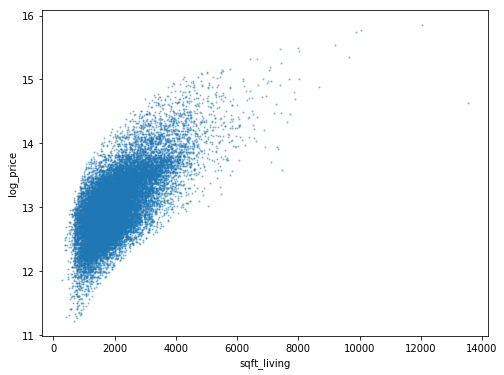

In [20]:
df.plot.scatter(x="sqft_living", y="log_price", alpha=0.35, s=1.5, figsize=(8,6));